In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import StrMethodFormatter
import numpy as np

These graphs are essential to storytelling. I start by showing Chicago's higher average crime rate compared to New York's. Then I show that Chicago's crime rate has seen a much larger drop over the shown years. Therefore, I zoom into Chicago's milestones (milestones here defined as certain policy changes/ expansions regarding surveillance) and their possible link to crime rates. Finally, I graph the crime rates of the four key wards I have identified earlier.

In [ ]:
DATA_PATH = "/content/drive/MyDrive/Group_Project/data/final_df_per_100k.csv"
OUT_PATH  = "/content/drive/MyDrive/Group_Project/data/nyc_chi_cross_section_avg.png"

df = pd.read_csv(DATA_PATH)
df.groupby("city", as_index=True)["crime_rate_per_100k"].mean().reindex(["Chicago","New York City"])

,crime_rate_per_100k
city,
Chicago,11444.309474
New York City,5943.847368


### Average Crime Rates per City

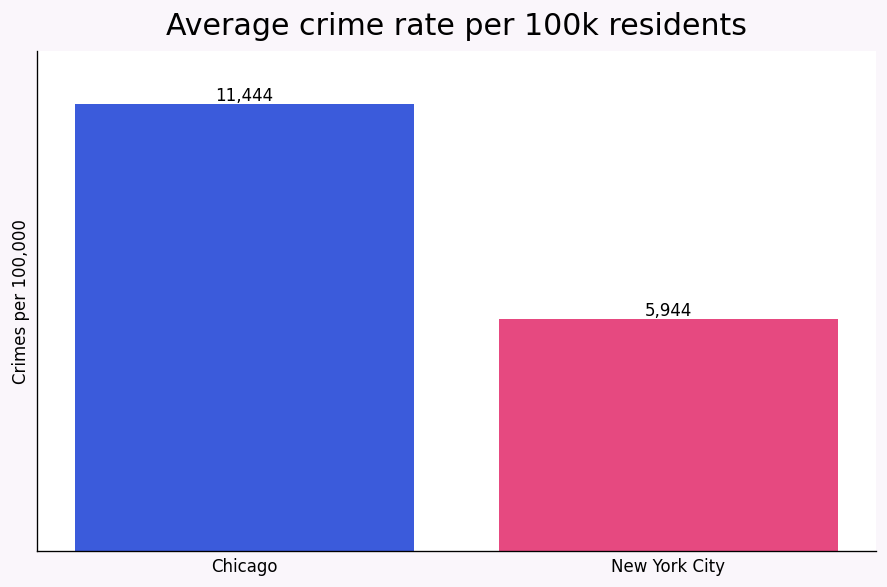

Saved to /content/drive/MyDrive/Group_Project/data/nyc_chi_cross_section_avg.png


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Group_Project/data/final_df_per_100k.csv"
OUT_PATH  = "/content/drive/MyDrive/Group_Project/data/nyc_chi_cross_section_avg.png"

df = pd.read_csv(DATA_PATH)
df["year"] = df["year"].astype(int)

avg = (df[df["city"].isin(["Chicago", "New York City"])]
         .groupby("city", as_index=True)["crime_rate_per_100k"]
         .mean()
         .reindex(["Chicago","New York City"]))


fig, ax = plt.subplots(figsize=(7.5,5), dpi=120)
fig.patch.set_facecolor("#faf6fb")
ax.set_facecolor("#ffffff")

avg_sorted = avg.sort_values(ascending=False)

palette = {"Chicago": "#3b5bdb", "New York City": "#e64980"}
colors = [palette[i] for i in avg_sorted.index]

bars = ax.bar(avg_sorted.index, avg_sorted.values, color=colors)

ax.set_title("Average crime rate per 100k residents", fontsize=18, pad=10)
ax.set_ylabel("Crimes per 100,000")
ax.set_xlabel("")
ax.set_yticks([])

ax.grid(axis="y", linewidth=0.6, alpha=0.25)
ax.tick_params(axis="x", length=0)
for spine in ["top","right"]:
    ax.spines[spine].set_visible(False)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{x:,.0f}"))

top = avg_sorted.max()
ax.set_ylim(0, top * 1.12)

for b in bars:
    v = b.get_height()
    ax.text(b.get_x() + b.get_width()/2, v,
            f"{v:,.0f}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.savefig(OUT_PATH, dpi=200, facecolor=fig.get_facecolor())
plt.show()

print(f"Saved to {OUT_PATH}")


### Crime Rate and Crime Counts Percentage Change

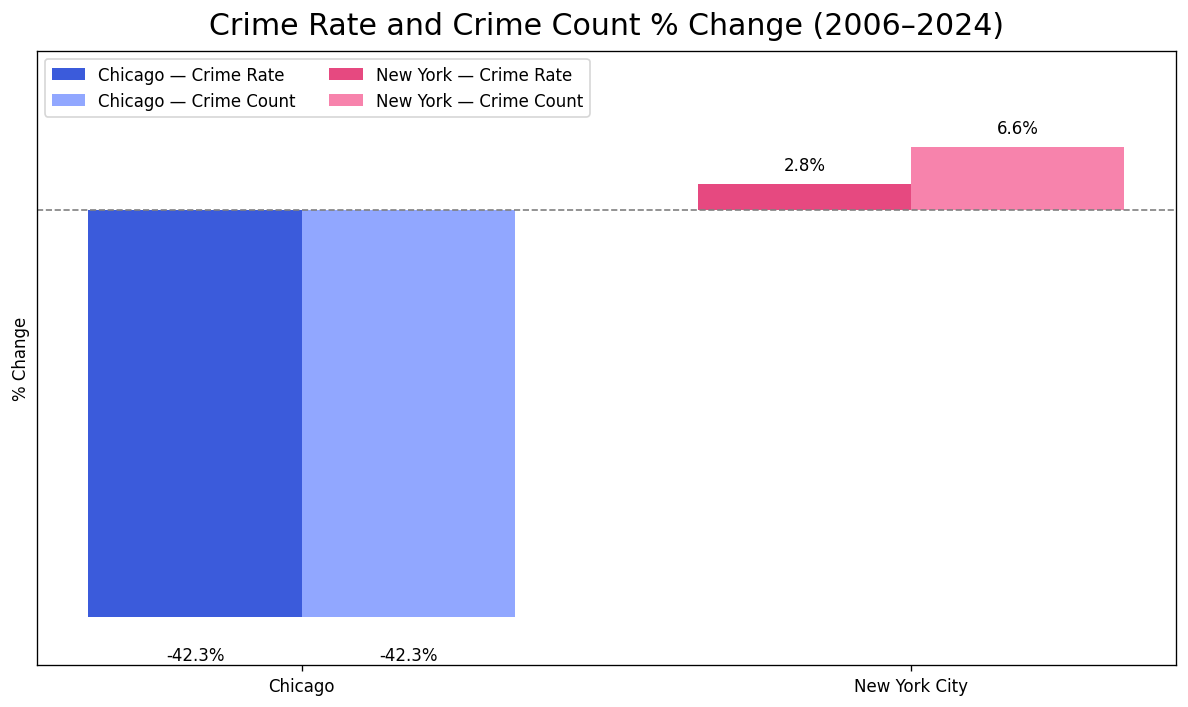

In [ ]:
df_2006 = df[df['year'] == 2006]
df_2024 = df[df['year'] == 2024]

merged = pd.merge(df_2006, df_2024, on='city', suffixes=('_2006', '_2024'))

merged['crime_rate_pct_change'] = ((merged['crime_rate_per_100k_2024'] - merged['crime_rate_per_100k_2006']) / merged['crime_rate_per_100k_2006']) * 100
merged['crime_count_pct_change'] = ((merged['crime_count_2024'] - merged['crime_count_2006']) / merged['crime_count_2006']) * 100

cities = merged['city']
crime_rate = merged['crime_rate_pct_change']
crime_count = merged['crime_count_pct_change']

palette_base = {"Chicago": "#3b5bdb", "New York City": "#e64980"}
palette_light = {"Chicago": "#91a7ff", "New York City": "#f783ac"}

rate_colors = [palette_base[c] for c in cities]
count_colors = [palette_light[c] for c in cities]

x = np.arange(len(cities))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6), dpi=120)
bars1 = ax.bar(x - width/2, crime_rate, width, label='Crime Rate % Change', color=rate_colors)
bars2 = ax.bar(x + width/2, crime_count, width, label='Crime Count % Change', color=count_colors)

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylabel('% Change')
ax.set_yticks([])
ax.set_title('Crime Rate and Crime Count % Change (2006–2024)', fontsize=18, pad=10)
ax.set_xticks(x)
ax.set_xticklabels(cities)
ax.grid(axis='y', alpha=0.2)

y_min = min(crime_rate.min(), crime_count.min()) - 5
y_max = max(crime_rate.max(), crime_count.max()) + 10
ax.set_ylim(y_min, y_max)

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2,
                yval + (1 if yval >= 0 else -3),
                f'{yval:.1f}%',
                ha='center', va='bottom' if yval>=0 else 'top', fontsize=10)

from matplotlib.patches import Patch
legend_items = [
    Patch(facecolor=palette_base["Chicago"], label="Chicago — Crime Rate"),
    Patch(facecolor=palette_light["Chicago"], label="Chicago — Crime Count"),
    Patch(facecolor=palette_base["New York City"], label="New York — Crime Rate"),
    Patch(facecolor=palette_light["New York City"], label="New York — Crime Count"),
]
ax.legend(handles=legend_items, loc='upper left', ncol=2)

plt.tight_layout()
plt.show()


### Zooming in New York for Storytelling

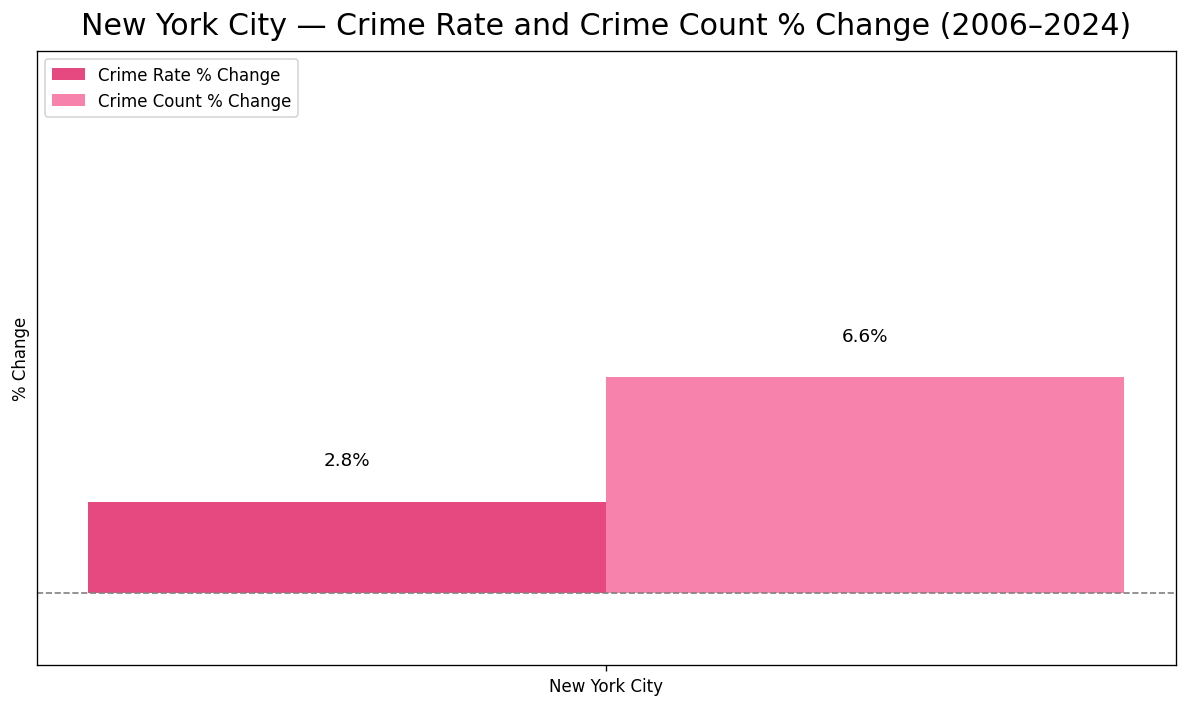

In [ ]:
df_nyc_2006 = df[(df['city'] == 'New York City') & (df['year'] == 2006)].iloc[0]
df_nyc_2024 = df[(df['city'] == 'New York City') & (df['year'] == 2024)].iloc[0]

crime_rate_pct_change  = ((df_nyc_2024['crime_rate_per_100k'] - df_nyc_2006['crime_rate_per_100k']) / df_nyc_2006['crime_rate_per_100k']) * 100
crime_count_pct_change = ((df_nyc_2024['crime_count'] - df_nyc_2006['crime_count']) / df_nyc_2006['crime_count']) * 100

nyc_base = "#e64980"
nyc_light = "#f783ac"

x = np.array([0])
width = 0.35

fig, ax = plt.subplots(figsize=(10,6), dpi=120)
bars1 = ax.bar(x - width/2, [crime_rate_pct_change],  width, label='Crime Rate % Change',  color=nyc_base)
bars2 = ax.bar(x + width/2, [crime_count_pct_change], width, label='Crime Count % Change', color=nyc_light)

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_ylabel('% Change')
ax.set_yticks([])
ax.set_title('New York City — Crime Rate and Crime Count % Change (2006–2024)', fontsize=18, pad=10)
ax.set_xticks(x)
ax.set_xticklabels(['New York City'])
ax.grid(axis='y', alpha=0.2)

y_min = min(crime_rate_pct_change, crime_count_pct_change) - 5
y_max = max(crime_rate_pct_change, crime_count_pct_change) + 10
ax.set_ylim(y_min, y_max)

for bars in [bars1, bars2]:
    for b in bars:
        y = b.get_height()
        ax.text(b.get_x() + b.get_width()/2,
                y + (1 if y >= 0 else -3),
                f'{y:.1f}%', ha='center',
                va='bottom' if y >= 0 else 'top', fontsize=11)

from matplotlib.patches import Patch
legend_items = [
    Patch(facecolor=nyc_base, label="Crime Rate % Change"),
    Patch(facecolor=nyc_light, label="Crime Count % Change"),
]
ax.legend(handles=legend_items, loc='upper left')

plt.tight_layout()
plt.show()


### Historic Crime Rate Change Chicago vs New York

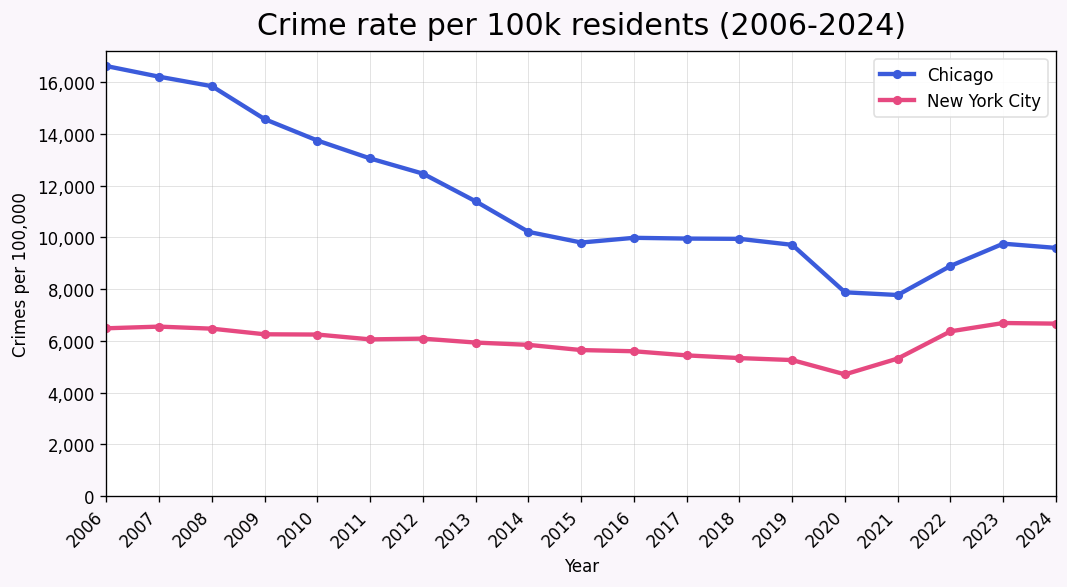

Saved to /content/drive/MyDrive/Group_Project/data/nyc_chi_linechart.png


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Group_Project/data/final_df_per_100k.csv"
OUT_PATH  = "/content/drive/MyDrive/Group_Project/data/nyc_chi_linechart.png"

df = pd.read_csv(DATA_PATH)
keep = (df[df["city"].isin(["Chicago", "New York City"])]
          .loc[:, ["city", "year", "crime_rate_per_100k"]]
          .copy())

keep["year"] = keep["year"].astype(int)

fig, ax = plt.subplots(figsize=(9,5), dpi=120)
fig.patch.set_facecolor("#faf6fb")
ax.set_facecolor("#ffffff")

palette = {"Chicago": "#3b5bdb", "New York City": "#e64980"}

years = list(range(2006, 2025))

for city, group in keep.groupby("city"):
    g = (group.set_index("year")
             .reindex(years)
             .rename_axis("year")
             .reset_index())

    ax.plot(
        g["year"], g["crime_rate_per_100k"],
        marker="o", linewidth=2.6, markersize=4.5,
        label=city, color=palette[city]
    )

ax.set_title("Crime rate per 100k residents (2006-2024)", fontsize=18, pad=10)
ax.set_xlabel("Year")
ax.set_ylabel("Crimes per 100,000")

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_ylim(bottom=0)

ax.set_xlim(2006, 2024)
ax.set_xticks(years)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha("right")

ax.grid(True, which="major", linewidth=0.6, alpha=0.35)

leg = ax.legend(frameon=True)
leg.get_frame().set_alpha(0.9)
leg.get_frame().set_edgecolor("#dddddd")

plt.tight_layout()
plt.savefig(OUT_PATH, dpi=200, facecolor=fig.get_facecolor())
plt.show()

print(f"Saved to {OUT_PATH}")

### Zooming in Chicago, milestones to keep in mind

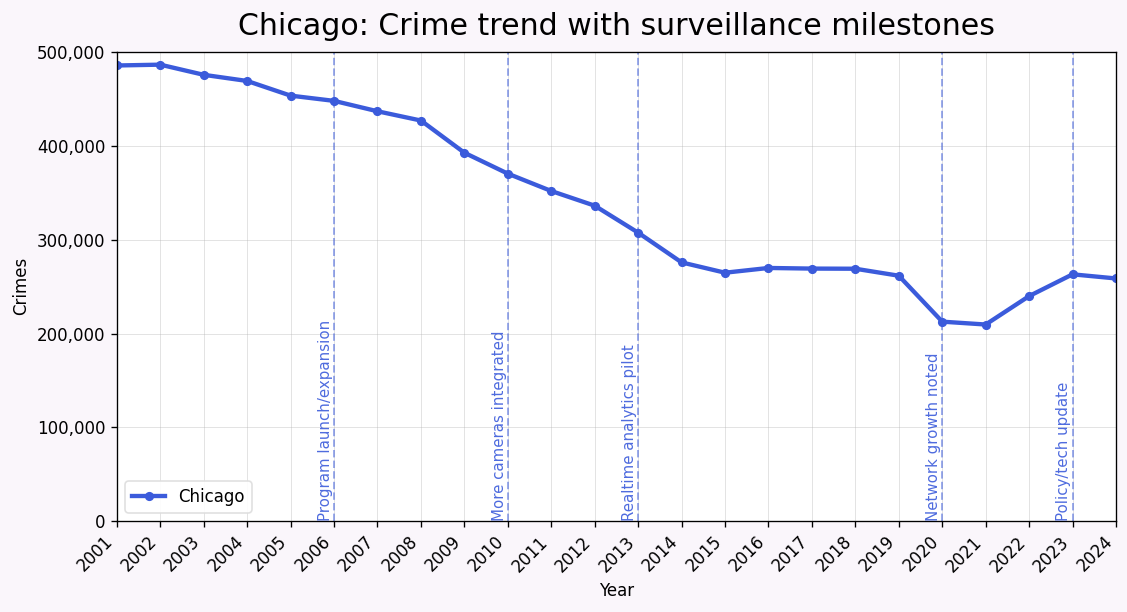

Saved to: /content/drive/MyDrive/Group_Project/data/chicago_crime_with_milestones.png


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Group_Project/data/crime_chicago.csv"
OUT_PATH  = "/content/drive/MyDrive/Group_Project/data/chicago_crime_with_milestones.png"

df = pd.read_csv(DATA_PATH, usecols=["year", "crime_count"]).copy()
df["year"] = df["year"].astype(int)

years = list(range(2001, 2025))
g = (df.set_index("year")
       .reindex(years)
       .rename_axis("year")
       .reset_index())

milestones = [
    (2006, "Program launch/expansion"),
    (2010, "More cameras integrated"),
    (2013, "Realtime analytics pilot"),
    (2020, "Network growth noted"),
    (2023, "Policy/tech update"),
]

fig, ax = plt.subplots(figsize=(9.5,5.2), dpi=120)
fig.patch.set_facecolor("#faf6fb")
ax.set_facecolor("#ffffff")

chi_color = "#3b5bdb"

ax.plot(
    g["year"], g["crime_count"],
    color=chi_color, marker="o",
    linewidth=2.6, markersize=4.5,
    label="Chicago"
)

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_ylim(bottom=0)

for yr, label in milestones:
    ax.axvline(yr, color=chi_color, linestyle="--", linewidth=1.2, alpha=0.5)
    NUDGE = 0.2
    ax.text(yr - NUDGE, ax.get_ylim()[0], label,
        rotation=90, va="bottom", ha="center",
        fontsize=9, color=chi_color, alpha=0.9, clip_on=False)

ax.set_title("Chicago: Crime trend with surveillance milestones", fontsize=18, pad=10)
ax.set_xlabel("Year")
ax.set_ylabel("Crimes")
ax.set_xlim(2001, 2024)
ax.set_xticks(years)
for lbl in ax.get_xticklabels():
    lbl.set_rotation(45)
    lbl.set_ha("right")

ax.grid(True, which="major", linewidth=0.6, alpha=0.35)
leg = ax.legend(frameon=True)
leg.get_frame().set_alpha(0.9)
leg.get_frame().set_edgecolor("#dddddd")

plt.tight_layout()
plt.savefig(OUT_PATH, dpi=200, facecolor=fig.get_facecolor())
plt.show()

print(f"Saved to: {OUT_PATH}")

Saved figure → /content/drive/MyDrive/Group_Project/data/ward_comparison_rates_2012_2024.png


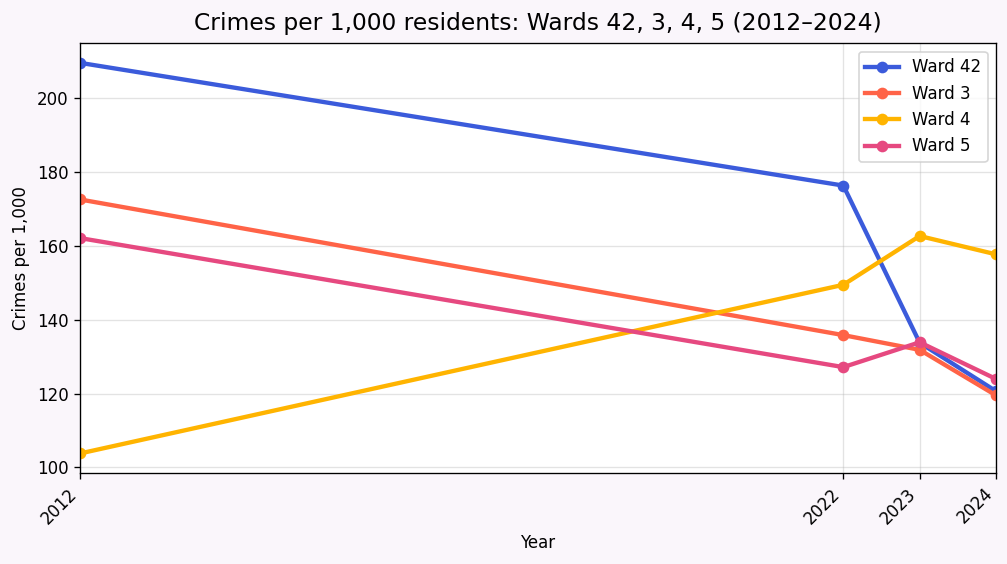

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path("/content/drive/MyDrive/Group_Project/data")
IN_FILE = BASE / "ward42_3_4_5_2012_2022_2023_2024.csv"

years = [2012, 2022, 2023, 2024]
wards = [42, 3, 4, 5]

df = pd.read_csv(IN_FILE)
df["ward"] = df["ward"].astype(int)
df["year"] = df["year"].astype(int)
df["crime_per_1000"] = df["crime_per_1000"].astype(float)

df = df[df["ward"].isin(wards) & df["year"].isin(years)]

fig, ax = plt.subplots(figsize=(8.5, 4.8), dpi=120)
fig.patch.set_facecolor("#faf6fb")
ax.set_facecolor("#ffffff")

colors = {42:"#3b5bdb", 3:"#ff6347", 4:"#ffb400", 5:"#e64980"}

for w in wards:
    g = df[df["ward"] == w].sort_values("year")
    ax.plot(
        g["year"], g["crime_per_1000"],
        marker="o", lw=2.6, label=f"Ward {w}",
        color=colors.get(w)
    )

ax.set_title(
    f"Crimes per 1,000 residents: Wards {', '.join(map(str, wards))} ({min(years)}–{max(years)})",
    fontsize=14, pad=8
)
ax.set_xlabel("Year")
ax.set_ylabel("Crimes per 1,000")
ax.set_xlim(min(years), max(years))
ax.set_xticks(years)

for lbl in ax.get_xticklabels():
    lbl.set_rotation(45)
    lbl.set_ha("right")

ax.grid(True, alpha=0.35)
ax.legend()
plt.tight_layout()

out_png = BASE / f"ward_comparison_rates_{min(years)}_{max(years)}.png"
plt.savefig(out_png, dpi=200, facecolor=fig.get_facecolor())
print("Saved figure →", out_png)

plt.show()


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

BASE = "/content/drive/MyDrive/Group_Project/data"
big_merge_crime_with_osm = pd.read_csv(f"{BASE}/big_merge_crime_with_osm.csv")

POLICY_YEAR = 2010

big_merge_crime_with_osm["Chicago"] = (big_merge_crime_with_osm["city"] == "Chicago").astype(int)
big_merge_crime_with_osm["Post"] = (big_merge_crime_with_osm["year"] >= POLICY_YEAR).astype(int)

model_df = big_merge_crime_with_osm[["crime_rate_per_100k","Chicago","Post","year","city"]].dropna()

did = smf.ols(
    "crime_rate_per_100k ~ Chicago*Post + C(year)",
    data=model_df
).fit(cov_type="HC1")

ate_name = "Chicago:Post"
b = float(did.params[ate_name])
lo, hi = did.conf_int().loc[ate_name].tolist()
p = float(did.pvalues[ate_name])

print(did.summary().tables[1])
print(f"\nDiD (policy={POLICY_YEAR}): Chicago×Post = {b:,.1f} per 100k "
      f"[{lo:,.1f}, {hi:,.1f}], p={p:.3g}")

                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6868.2575    441.300     15.564      0.000    6003.325    7733.190
C(year)[T.2007]  -173.3700    432.345     -0.401      0.688   -1020.750     674.010
C(year)[T.2008]  -396.7450    404.478     -0.981      0.327   -1189.508     396.018
C(year)[T.2009] -1142.4750    689.188     -1.658      0.097   -2493.259     208.309
C(year)[T.2010]  1883.9983   1514.101      1.244      0.213   -1083.585    4851.582
C(year)[T.2011]  1444.0283   1266.161      1.140      0.254   -1037.602    3925.659
C(year)[T.2012]  1164.5433    966.703      1.205      0.228    -730.160    3059.247
C(year)[T.2013]   553.0733    529.219      1.045      0.296    -484.177    1590.324
C(year)[T.2014]   -81.4117    201.421     -0.404      0.686    -476.189     313.365
C(year)[T.2015]  -388.1767    247.845     -1.566      0.117    -873.944     

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 21, but rank is 20
  warnings.warn('covariance of constraints does not have full '


What I have built:
- a clean city-year panel with crime rates per 100k, counts, population, and socioeconomics
- OSM snapshot of CCTV and police locations, scaled per 100k
- a Chicago ward case study (42 vs 38)
- an illustrative model comparing Chicago to NYC

Descriptive hard facts:
- Levels: Chicago's average crime rate is ~1.9x NYC's despite ~6x the mapped CCTV per 100k and ~1.5x the mapped police locations per 100k (OSM snapshot)
- Trends: 2006 --> 2024, Chicago fell ~42% in crime per 100k, NYC rose ~3%
- Within Chicago (wards): 42 and 38 both decline more than the city average; Ward 42' drop is slightly larger
- Socioeconomics: NYC shows higher median income and lower unemployment on average—patterns that align with its lower crime levels

Milestones Chicago:
- We overlay Chicago surveillance milestones at 2006 (launch/expansion), 2010 (integration growth), 2016 (further expansion/analytics) on the crime-rate line
- Around these dates, Chicago's rate continues to trend downward, especially post 2010

Simple Model:
- Large negative interaction --> descriptive diversion

Conclusion:
- Cross-section: "More mapped cameras --> lower crime" is not supported, Chicago has far more mapped CCTV yet higher crime levels than NYC
- Over time: Chicago's sizeable decline vs NYC is real,  it coincides with known milestones (2006/2010/2016), but this does not prove surveillance caused the drop

Limitations:
- OSM is a present-day mapping snapshot (not a historical camera series)
- Milestones are known calendar points, not counts of added devices
- Two-city comparison is sensitive to differences in policing/policy

With the data we have, mass surveillance alone does not explain safer cities. Chicago's decline (particularly after 2010 and 2016 milestones) is descriptively strong, but not causal.




